In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc  

rc('font', family='NanumGothic') 			
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
RANDOM_SEED = 42
TEST_DIR = '../data/test/'
TRAIN_DIR = '../data/train/'

In [3]:
# 2017 data
df_2017 = pd.read_csv(TRAIN_DIR + 'KNOW_2017.csv', index_col='idx')
df_2017.replace(r'^\s*$', -1, regex=True, inplace=True)
df_2017['knowcode'] = df_2017['knowcode'].astype('category')
df_2017

,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,...,bq37,bq38,bq38_1,bq39_1,bq39_2,bq40,bq41_1,bq41_2,bq41_3,knowcode
idx,,,,,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,4,4,3,4,...,52,2,실업,1,1,1,4000,-1,2200,825101
1,4,5,4,5,3,4,3,4,3,4,...,38,4,건축공학,1,1,1,-1,-1,2400,140204
2,3,4,3,4,3,4,5,6,4,5,...,50,4,건축공학,1,1,1,4000,-1,2400,140204
3,3,3,3,3,3,5,4,5,4,6,...,42,4,환경학과,1,1,1,7000,-1,3500,140601
4,4,5,3,4,3,4,4,5,3,4,...,51,4,건축공학,1,1,1,4000,-1,2500,140204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,3,5,2,4,3,3,2,2,2,3,...,50,4,산업디자인,1,1,1,5200,-1,1800,411301
9482,5,5,5,5,5,5,3,4,4,5,...,37,4,우주항공공학,1,1,1,4000,-1,3000,151105
9483,3,3,4,6,3,3,4,5,4,5,...,32,2,기계,1,4,2,2700,-1,1500,701101


In [4]:
df_2017.describe()

,aq1_1,aq2_1,aq3_1,aq4_1,aq5_1,aq6_1,aq7_1,aq8_1,aq9_1,aq10_1,...,bq26,bq27,bq28,bq29,bq35,bq36,bq37,bq38,bq39_1,bq39_2
count,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.0000,9486.000000,9486.000000,...,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000,9486.000000
mean,3.239827,3.098145,3.107738,2.429475,2.576956,2.791271,2.843032,2.8891,2.976070,3.041746,...,3.655387,3.441704,3.328168,2.524141,2.870441,1.314147,41.485874,3.527514,1.137149,1.892157
std,1.066843,1.077475,1.063899,1.247805,1.151714,1.150587,1.134836,1.1843,1.171691,1.083614,...,0.700513,0.732790,0.770668,0.789492,0.852283,0.464200,10.405128,1.140722,0.344023,1.635230
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,33.000000,3.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.0000,3.000000,3.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,40.000000,4.000000,1.000000,1.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.0000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,49.000000,4.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,88.000000,6.000000,2.000000,7.000000


In [5]:
df_2017['knowcode'].describe()

count        9486
unique        538
top       9999999
freq          382
Name: knowcode, dtype: int64

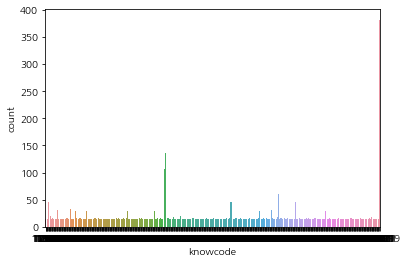

In [6]:
sns.countplot(data=df_2017, x='knowcode')
plt.show()

In [8]:
df_2017.groupby('knowcode')['aq1_1'].count().sort_values(ascending=False)

knowcode
9999999    382
212101     137
211101     106
301004      78
214301      62
          ... 
221301      15
221201      15
221101      15
215101      15
411201      15
Name: aq1_1, Length: 538, dtype: int64

In [5]:
text_columns = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1']
df_2017[text_columns]

,bq4_1a,bq4_1b,bq4_1c,bq5_2,bq19_1,bq30,bq31,bq32,bq33,bq34,bq38_1
idx,,,,,,,,,,,
0,자동차도장기능사,-1,-1,실무교육,생산설비의 자동화로,없다,없다,없다,건설현장 노무직,없다,실업
1,건축전기설비기술사,-1,-1,-1,건설 수주가 없어서,없다,"매타기, 드라이버, 가위, CAD",-1,-1,-1,건축공학
2,건축전기설비기술사,-1,-1,-1,신축 건설경기가 좋지 않아서,없다,"건축설계표, 오토캐드, 파이프, 보일러",-1,-1,-1,건축공학
3,지적기사,-1,-1,측량 및 정보통신기술 교육,"업무량 감소, 자동화로 인해서",지적기사,"토탈스테이션, SZP",무,지적공무원,-1,환경학과
4,건축전기설비기술사,-1,-1,-1,부동산 거품 빠지면서 건축 경기도 덩달아 불황,없다,"캐드, 엑셀, 건축도면",-1,-1,-1,건축공학
...,...,...,...,...,...,...,...,...,...,...,...
9481,-1,-1,-1,편집기술에 원리와 이해능력,출판업무 특성상 기획업무는 변함없음,없다,"한글, 편집프로그램, 포토샵, 일러스트",없다,마케팅업무,없다,산업디자인
9482,-1,-1,-1,"도면 작성 교육, 전자 기초 이해",항공우주분야는 국가 경쟁력을 위해 육성해야 되는 분야이므로,없다,"AUTO CAD , CATIA, 전문 특수정비도구(툴)",없다,없다,없다,우주항공공학
9483,-1,-1,-1,-1,건설경기는 꾸준해서,건설 노가대,"볼트, 리벳",없다,없다,없다,기계


* `bq4_1a` (요구자격증1_1), `bq38_1` (전공)를 제외하고는 전처리 하기 어려운 데이터
* `bq4_1a`, `bq4_1b`, `bq4_1c`의 경우 모두 합쳐서 개수를 따져보면 어떨까?
    - 실제로 중요한 건 어떤 자격증이냐라서, 자격증의 종류가 더 중요할 듯


In [6]:
target_column = ['knowcode']
not_text_columns = [col for col in df_2017.columns if col not in text_columns and col not in target_column]

to_see_columns = not_text_columns + ['bq4_1a', 'bq38_1']

df_2017[to_see_columns]

,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,...,bq37,bq38,bq39_1,bq39_2,bq40,bq41_1,bq41_2,bq41_3,bq4_1a,bq38_1
idx,,,,,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,4,4,3,4,...,52,2,1,1,1,4000,-1,2200,자동차도장기능사,실업
1,4,5,4,5,3,4,3,4,3,4,...,38,4,1,1,1,-1,-1,2400,건축전기설비기술사,건축공학
2,3,4,3,4,3,4,5,6,4,5,...,50,4,1,1,1,4000,-1,2400,건축전기설비기술사,건축공학
3,3,3,3,3,3,5,4,5,4,6,...,42,4,1,1,1,7000,-1,3500,지적기사,환경학과
4,4,5,3,4,3,4,4,5,3,4,...,51,4,1,1,1,4000,-1,2500,건축전기설비기술사,건축공학
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,3,5,2,4,3,3,2,2,2,3,...,50,4,1,1,1,5200,-1,1800,-1,산업디자인
9482,5,5,5,5,5,5,3,4,4,5,...,37,4,1,1,1,4000,-1,3000,-1,우주항공공학
9483,3,3,4,6,3,3,4,5,4,5,...,32,2,1,4,2,2700,-1,1500,-1,기계


In [7]:
df_2017['bq4_1a'] = df_2017['bq4_1a'].astype('category')
df_2017['bq38_1'] = df_2017['bq38_1'].astype('category')
df_2017['bq38_1']

idx
0           실업
1         건축공학
2         건축공학
3         환경학과
4         건축공학
         ...  
9481     산업디자인
9482    우주항공공학
9483        기계
9484     문헌정보학
9485        전기
Name: bq38_1, Length: 9486, dtype: category
Categories (1453, object): [-1, '(대학원재학중)관광경영학', '3사관학교', 'IT공학', ..., '회계세무학', '회계학', '회계학과', '회화']

# 코사인 유사도

In [8]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [ ]:
# has_na_columns = df_2017[not_text_columns].dropna(axis=1).columns
# df_2017[[col for col in df_2017[not_text_columns] if col not in has_na_columns]].describe()

In [12]:
cs_matrix = cosine_similarity(df_2017[not_text_columns + ['knowcode']].T)
cs_matrix.shape

(144, 144)

<AxesSubplot:>

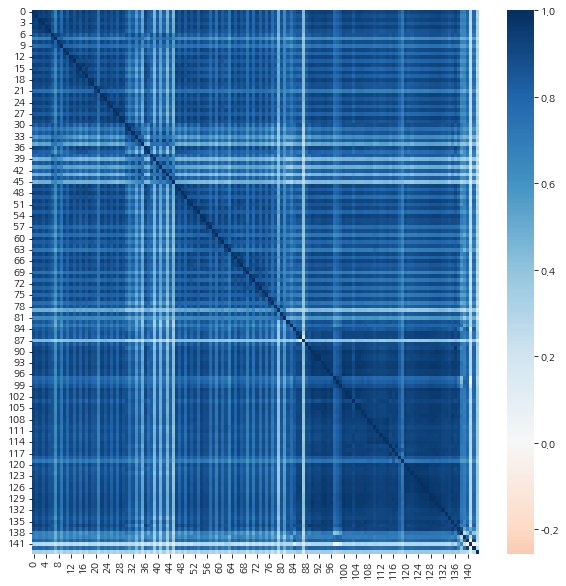

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cs_matrix, cmap="RdBu", center=0.0, ax=ax)

In [18]:
cs_matrix[:,-1]

array([0.33547137, 0.31141763, 0.34068974, 0.31148652, 0.33753379,
       0.30750087, 0.3264053 , 0.23635775, 0.3341952 , 0.26681518,
       0.34905426, 0.30535884, 0.32564938, 0.27382598, 0.3103366 ,
       0.25436933, 0.31944166, 0.26888304, 0.33883556, 0.30936154,
       0.31810034, 0.23704636, 0.32889308, 0.2962825 , 0.33380501,
       0.28931842, 0.33614532, 0.28535117, 0.33882332, 0.31342318,
       0.35886149, 0.32283801, 0.34472335, 0.26170312, 0.32956272,
       0.21265308, 0.30535249, 0.23615556, 0.32572333, 0.19647824,
       0.31955674, 0.1878714 , 0.32447906, 0.19470163, 0.31113734,
       0.15006149, 0.31970837, 0.26846467, 0.32377911, 0.25772467,
       0.32972054, 0.29063351, 0.32360363, 0.2613292 , 0.34992652,
       0.3322288 , 0.34471455, 0.29450084, 0.33300813, 0.26182334,
       0.33615836, 0.2796655 , 0.32387959, 0.24117693, 0.32814605,
       0.27519245, 0.33639767, 0.30086147, 0.32119337, 0.24273649,
       0.32108062, 0.24516534, 0.33365908, 0.2734988 , 0.33378

<AxesSubplot:>

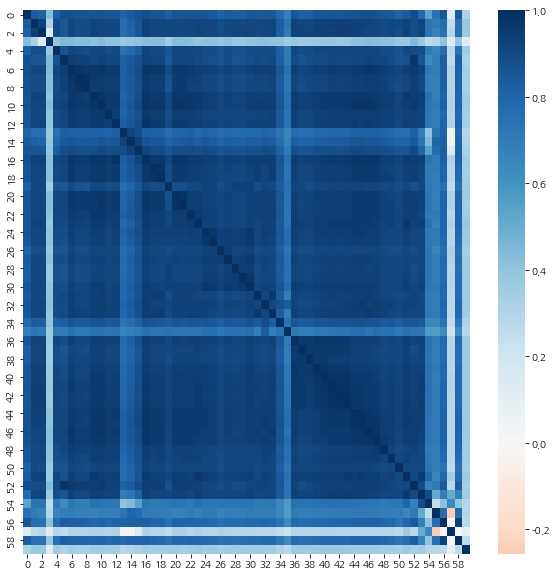

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cs_matrix[84:,84:], cmap="RdBu", center=0.0, ax=ax)

In [25]:
cosine_list = cs_matrix[:,-1][:-1].tolist()
cosine_list[:5]

[0.3354713746773652,
 0.31141762603719625,
 0.340689738878992,
 0.3114865222530673,
 0.3375337869781734]

In [36]:
idx_list = []
for v1 in cosine_list:
    cnt = 0
    for v2 in cosine_list:
        if v1 < v2:
            cnt += 1
    idx_list.append(cnt)
idx_list[:5]

[56, 93, 46, 92, 52]

In [38]:
for ix, rank_v in enumerate(zip(idx_list, cosine_list)):
    rank, v = rank_v
    if rank < 5:
        print(f"rank {rank}, question: {not_text_columns[ix]} cosine_similarity {v}")


rank 0, question: bq4 cosine_similarity 0.37737120837136134
rank 3, question: bq17 cosine_similarity 0.3696718656888884
rank 1, question: bq24_2 cosine_similarity 0.37202945604994575
rank 4, question: bq24_8 cosine_similarity 0.3687832160433888
rank 2, question: bq37 cosine_similarity 0.37185440457522684
